In [12]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
from matplotlib import colors


%matplotlib inline

In [23]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    if type(energy_list) is list:
        energy_list = np.array(energy_list)
    
    c = (1/(T**2 * N)) * np.var(energy_list)
    
    return c

def sus(mag_list, T, N):
    """Compute susceptibility for an input list of magnetization values at temperature T and lattice sites N"""
    
    if type(mag_list) is list:
        mag_list = np.array(mag_list)
    
    chi = (1/(T*N)) * np.var(mag_list)
    
    return chi

In [19]:
def bootstrap_mean(values, n):
    """Uses the bootstrap method to compute the error in the mean of a given list of values"""
    
    ns = len(values)
    
    means = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(values, ns)
        means[i] = np.mean(samples)
    
    error = np.std(means)
    
    return error
    
    
    
    
def bootstrap_c(energies, T, N, n):
    """Uses bootstrap to compute the error in the specific heat for an input set of energies"""
    
    ns = len(energies)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(energies, ns)
        values[i] = spec_heat_ps(samples, T, N)
        
    error = np.std(values)
    
    return error





def bootstrap_s(magps, T, N, n):
    """Uses bootstrap to compute the error in the susceptibility for an input set of magnetization"""
    
    ns = len(magps)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(magps, ns)
        values[i] = sus(samples, T, N)
    
    error = np.std(values)
    
    return error
        

In [9]:
temps = [t for t in np.arange(1.6, 2.91, 0.01)]

In [30]:
eneps_list8 = np.load('eneps_list8.npy')
spec_heat8 = np.load('spec_heat8.npy')
magps_list8 = np.load('magps_list8.npy')
mag_sus8 = np.load('mag_sus8.npy')
energy_dict8 = np.load('ene_dict8.npy')[()]
mag_dict8 = np.load('mag_dict8.npy')[()]

eneps_list10 = np.load('eneps_list10.npy')
spec_heat10 = np.load('spec_heat10.npy')
magps_list10 = np.load('magps_list10.npy')
mag_sus10 = np.load('mag_sus10.npy')
energy_dict10 = np.load('ene_dict10.npy')[()]
mag_dict10 = np.load('mag_dict10.npy')[()]

eneps_list15 = np.load('eneps_list15.npy')
spec_heat15 = np.load('spec_heat15.npy')
magps_list15 = np.load('magps_list15.npy')
mag_sus15 = np.load('mag_sus15.npy')
energy_dict15 = np.load('ene_dict15.npy')[()]
mag_dict15 = np.load('mag_dict15.npy')[()]

eneps_list20 = np.load('eneps_list20.npy')
spec_heat20 = np.load('spec_heat20.npy')
magps_list20 = np.load('magps_list20.npy')
mag_sus20 = np.load('mag_sus20.npy')
energy_dict20 = np.load('ene_dict20.npy')[()]
mag_dict20 = np.load('mag_dict20.npy')[()]

eneps_list25 = np.load('eneps_list25.npy')
spec_heat25 = np.load('spec_heat25.npy')
magps_list25 = np.load('magps_list25.npy')
mag_sus25 = np.load('mag_sus25.npy')
energy_dict25 = np.load('ene_dict25.npy')[()]
mag_dict25 = np.load('mag_dict25.npy')[()]

eneps_list30 = np.load('eneps_list30.npy')
spec_heat30 = np.load('spec_heat30.npy')
magps_list30 = np.load('magps_list30.npy')
mag_sus30 = np.load('mag_sus30.npy')
energy_dict30 = np.load('ene_dict30.npy')[()]
mag_dict30 = np.load('mag_dict30.npy')[()]

In [17]:
keys = list(mag_dict8.keys())

In [24]:
absmag8 = np.zeros((131, 400))

for i in range(131):
    for j in range(400):
        absmag8[i, j] = abs(mag_dict8[keys[i]][j])

mag_errors8 = []

for i in range(131):
    mag_errors8.append(bootstrap_mean(absmag8[i,:], 1000))
    
mag_errors8 = np.array(mag_errors8)/64

ene_errors8 = []

for k in keys:
    ene_errors8.append(bootstrap_mean(energy_dict8[k], 1000))
    
ene_errors8 = np.array(ene_errors8)/64

sus_errors8 = []

for i in range(131):
    sus_errors8.append(bootstrap_s(absmag8[i,:], temps[i], 64, 1000))
    
sh_errors8 = []

for i in range(131):
    sh_errors8.append(bootstrap_c(energy_dict8[keys[i]], temps[i], 64, 1000))

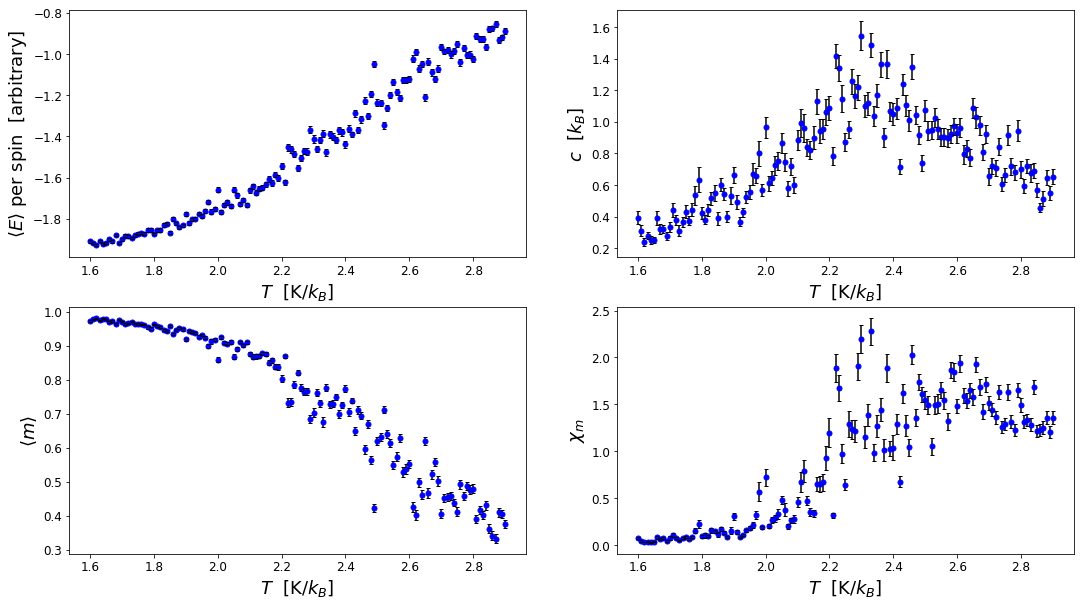

In [70]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list8, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list8, yerr = ene_errors8, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat8, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat8, yerr = sh_errors8, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, magps_list8, 'bo', markersize = 5)
plt.errorbar(temps, magps_list8, yerr = mag_errors8, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus8, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus8, yerr = sus_errors8, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

plt.savefig('ising8.pdf',bbox_inches = 'tight')


In [48]:
absmag10 = np.zeros((131, 500))

for i in range(131):
    for j in range(500):
        absmag10[i, j] = abs(mag_dict10[keys[i]][j])
        
absmagmean10 = np.array([np.mean(absmag10[i, :]) for i in range(131)])/100

mag_errors10 = []

for i in range(131):
    mag_errors10.append(bootstrap_mean(absmag10[i,:], 1000))
    
mag_errors10 = np.array(mag_errors10)/100

ene_errors10 = []

for k in keys:
    ene_errors10.append(bootstrap_mean(energy_dict10[k], 1000))
    
ene_errors10 = np.array(ene_errors10)/100

sus_errors10 = []

for i in range(131):
    sus_errors10.append(bootstrap_s(absmag10[i,:], temps[i], 100, 1000))
    
sh_errors10 = []

for i in range(131):
    sh_errors10.append(bootstrap_c(energy_dict10[keys[i]], temps[i], 100, 1000))

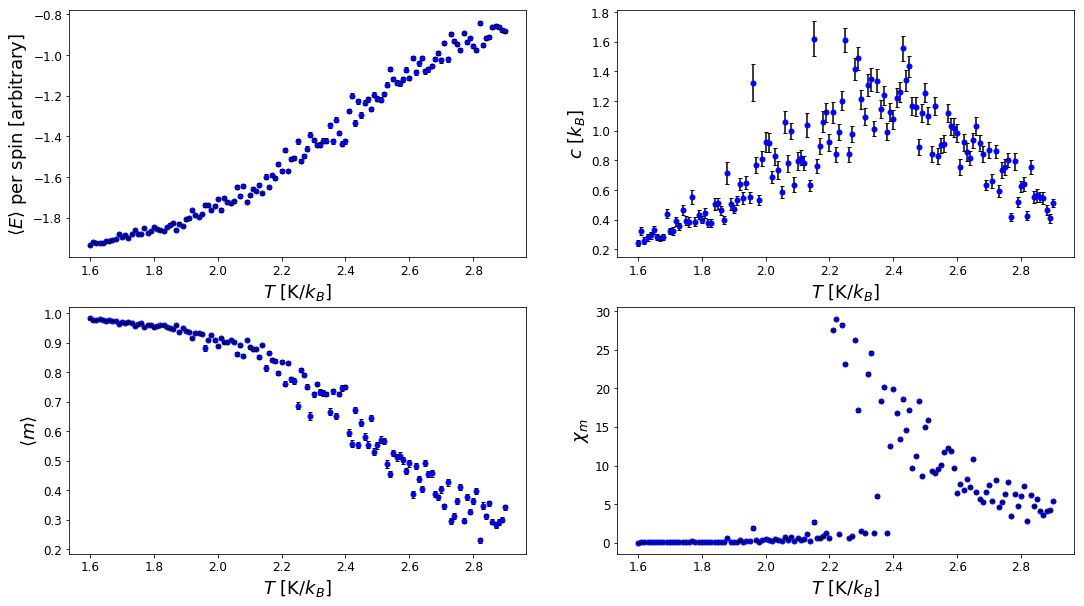

In [60]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list10, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list10, yerr = ene_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$ [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat10, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat10, yerr = sh_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$ [K/$k_B$]", fontsize=18)
plt.ylabel("$c$ [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmean10, 'bo', markersize = 5)
plt.errorbar(temps, absmagmean10, yerr = mag_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$ [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus10, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus10, yerr = sus_errors10, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$ [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

plt.savefig('ising10.pdf',bbox_inches = 'tight')


In [50]:
absmag15 = np.zeros((131, 750))

for i in range(131):
    for j in range(750):
        absmag15[i, j] = abs(mag_dict15[keys[i]][j])
        
absmagmean15 = np.array([np.mean(absmag15[i, :]) for i in range(131)])/225

mag_errors15 = []

for i in range(131):
    mag_errors15.append(bootstrap_mean(absmag15[i,:], 1000))
    
mag_errors15 = np.array(mag_errors15)/225

ene_errors15 = []

for k in keys:
    ene_errors15.append(bootstrap_mean(energy_dict15[k], 1000))
    
ene_errors15 = np.array(ene_errors15)/225

sus_errors15 = []

for i in range(131):
    sus_errors15.append(bootstrap_s(absmag15[i,:], temps[i], 225, 1000))
    
sh_errors15 = []

for i in range(131):
    sh_errors15.append(bootstrap_c(energy_dict15[keys[i]], temps[i], 225, 1000))

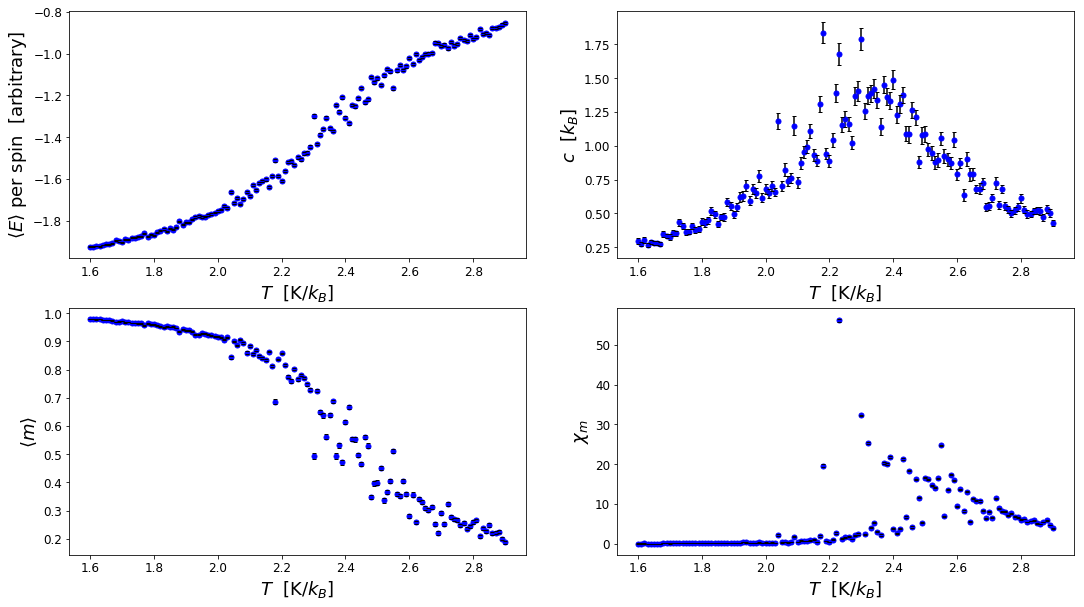

In [69]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list15, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list15, yerr = ene_errors15, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat15, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat15, yerr = sh_errors15, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmean15, 'bo', markersize = 5)
plt.errorbar(temps, absmagmean15, yerr = mag_errors15, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus15, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus15, yerr = sus_errors15, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

plt.savefig('ising15.pdf',bbox_inches = 'tight')


In [56]:
absmag20 = np.zeros((131, 1000))

for i in range(131):
    for j in range(1000):
        absmag20[i, j] = abs(mag_dict20[keys[i]][j])
        
absmagmean20 = np.array([np.mean(absmag20[i, :]) for i in range(131)])/400

mag_errors20 = []

for i in range(131):
    mag_errors20.append(bootstrap_mean(absmag20[i,:], 1000))
    
mag_errors20 = np.array(mag_errors20)/400

ene_errors20 = []

for k in keys:
    ene_errors20.append(bootstrap_mean(energy_dict20[k], 1000))
    
ene_errors20 = np.array(ene_errors20)/400

sus_errors20 = []

for i in range(131):
    sus_errors20.append(bootstrap_s(absmag20[i,:], temps[i], 400, 1000))
    
sh_errors20 = []

for i in range(131):
    sh_errors20.append(bootstrap_c(energy_dict20[keys[i]], temps[i], 400, 1000))

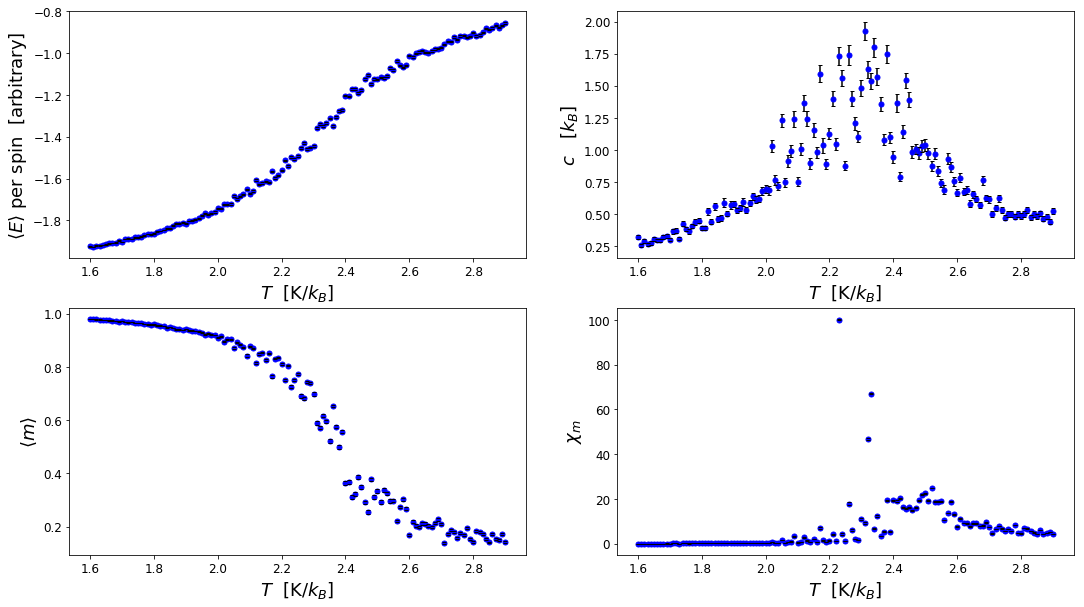

In [71]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list20, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list20, yerr = ene_errors20, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat20, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat20, yerr = sh_errors20, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$   [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmean20, 'bo', markersize = 5)
plt.errorbar(temps, absmagmean20, yerr = mag_errors20, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus20, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus20, yerr = sus_errors20, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

plt.savefig('ising20.pdf',bbox_inches = 'tight')


In [58]:
absmag25 = np.zeros((131, 1250))

for i in range(131):
    for j in range(1250):
        absmag25[i, j] = abs(mag_dict25[keys[i]][j])
        
absmagmean25 = np.array([np.mean(absmag25[i, :]) for i in range(131)])/625

mag_errors25 = []

for i in range(131):
    mag_errors25.append(bootstrap_mean(absmag25[i,:], 1000))
    
mag_errors25 = np.array(mag_errors25)/625

ene_errors25 = []

for k in keys:
    ene_errors25.append(bootstrap_mean(energy_dict25[k], 1000))
    
ene_errors25 = np.array(ene_errors25)/625

sus_errors25 = []

for i in range(131):
    sus_errors25.append(bootstrap_s(absmag25[i,:], temps[i], 625, 1000))
    
sh_errors25 = []

for i in range(131):
    sh_errors25.append(bootstrap_c(energy_dict25[keys[i]], temps[i], 625, 1000))

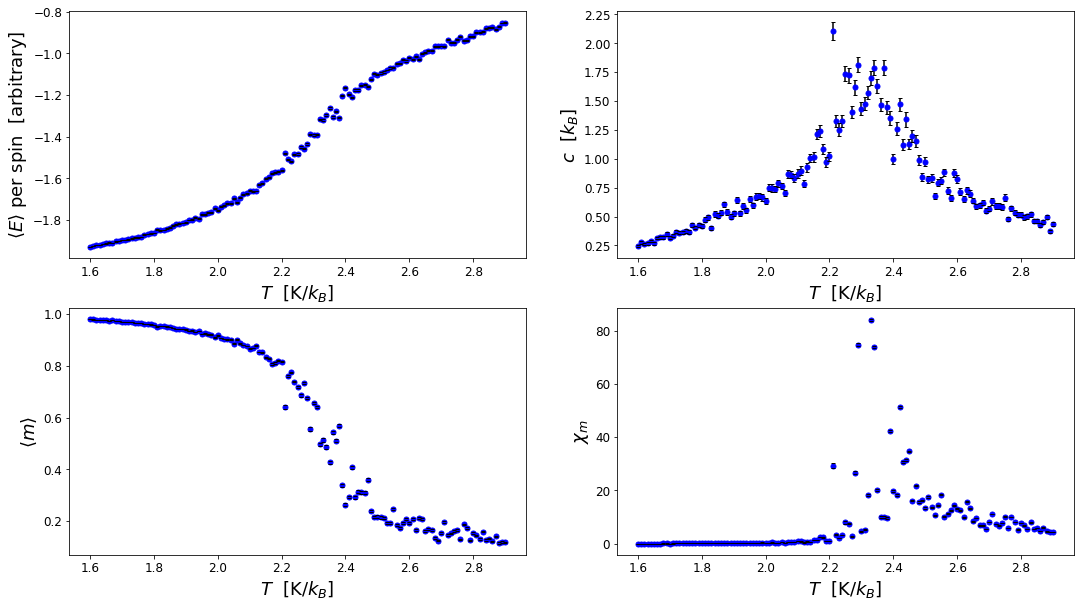

In [72]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list25, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list25, yerr = ene_errors25, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat25, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat25, yerr = sh_errors25, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmean25, 'bo', markersize = 5)
plt.errorbar(temps, absmagmean25, yerr = mag_errors25, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus25, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus25, yerr = sus_errors25, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

plt.savefig('ising25.pdf',bbox_inches = 'tight')


In [73]:
absmag30 = np.zeros((131, 1500))

for i in range(131):
    for j in range(1500):
        absmag30[i, j] = abs(mag_dict30[keys[i]][j])
        
absmagmean30 = np.array([np.mean(absmag30[i, :]) for i in range(131)])/900

mag_errors30 = []

for i in range(131):
    mag_errors30.append(bootstrap_mean(absmag30[i,:], 1000))
    
mag_errors30 = np.array(mag_errors30)/900

ene_errors30 = []

for k in keys:
    ene_errors30.append(bootstrap_mean(energy_dict30[k], 1000))
    
ene_errors30 = np.array(ene_errors30)/900

sus_errors30 = []

for i in range(131):
    sus_errors30.append(bootstrap_s(absmag30[i,:], temps[i], 900, 1000))
    
sh_errors30 = []

for i in range(131):
    sh_errors30.append(bootstrap_c(energy_dict30[keys[i]], temps[i], 900, 1000))

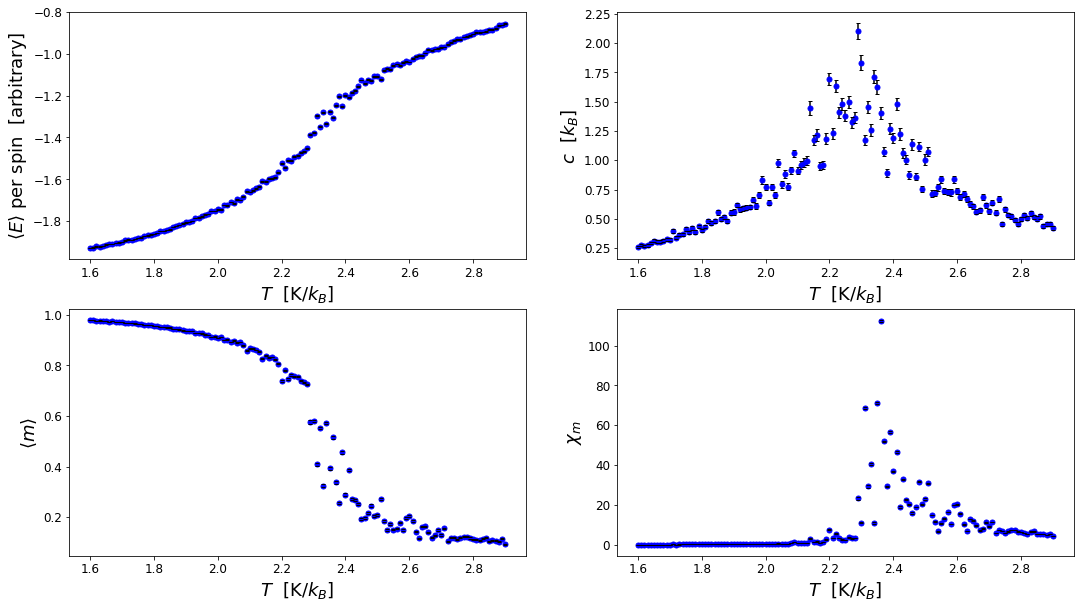

In [75]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values  

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list30, 'bo', markersize = 5)
plt.errorbar(temps, eneps_list30, yerr = ene_errors30, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle E \rangle$ per spin  [arbitrary]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat30, 'bo', markersize = 5)
plt.errorbar(temps, spec_heat30, yerr = sh_errors30, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel("$c$  [$k_B$]", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 3 )
plt.plot(temps, absmagmean30, 'bo', markersize = 5)
plt.errorbar(temps, absmagmean30, yerr = mag_errors30, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\langle m \rangle$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

fig.add_subplot(2, 2, 4 )
plt.plot(temps, mag_sus30, 'bo', markersize = 5)
plt.errorbar(temps, mag_sus30, yerr = sus_errors30, ecolor = 'black',capsize = 2, linestyle = 'None')
plt.xlabel(r"$T$  [K/$k_B$]", fontsize=18)
plt.ylabel(r"$\chi_m$", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 12)

#plt.savefig('ising30.pdf',bbox_inches = 'tight')
